<a href="https://colab.research.google.com/github/ryann-arruda/machine-learning/blob/main/machine_learning_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('clothes_price_prediction_data.csv')
df

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
5,Reebok,Jacket,Red,XL,Nylon,19
6,Puma,Jacket,Red,XXL,Polyester,31
7,Adidas,Dress,Red,XS,Denim,46
8,Reebok,Dress,Black,S,Wool,97
9,Adidas,Jeans,Yellow,L,Wool,80


## **Preprocessing**

Let's know the data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


Thus, executing the previous cell, we can observe that this data set has five columns whose type is *string*, while one column (**Price**) has the type *int*.

Before proceeding with the preprocessing step, you need to check for missing data.

In [ ]:
df.isnull().sum()

,0
Brand,0
Category,0
Color,0
Size,0
Material,0
Price,0


We can see in the previous execution that there is no missing data. However, another important point that must be checked is the existence of duplicate data, because if there is any, it must be eliminated.

In [ ]:
df.duplicated().sum()

0

Now, let's analyze the balance of the data in relation to each characteristic that composes it, with the exception of price, which will be the target attribute that will be predicted by the model.

In [ ]:
df['Brand'].value_counts()

,count
Brand,
Under Armour,179
Puma,168
Adidas,166
Nike,165
New Balance,164
Reebok,158


In [ ]:
df['Category'].value_counts()

,count
Category,
Jacket,191
Shoes,172
Jeans,167
Dress,166
Sweater,160
T-shirt,144


In [ ]:
df['Color'].value_counts()

,count
Color,
Yellow,173
White,171
Red,168
Black,163
Blue,163
Green,162


In [ ]:
df['Material'].value_counts()

,count
Material,
Polyester,175
Silk,173
Wool,172
Denim,163
Cotton,162
Nylon,155


In [ ]:
df['Size'].value_counts()

,count
Size,
XS,196
XXL,173
XL,167
S,166
M,157
L,141


Next, we will transform the data from categorical values ​​to numeric values ​​using the One-Hot-Encoding technique. However, since this technique is used with values ​​that do not represent a pre-established sequence or order, it will only be used with the **Brand**, **Category**, **Color** and **Material** columns.

In [ ]:
encoded_brand = pd.get_dummies(df['Brand'])
encoded_category = pd.get_dummies(df['Category'])
encoded_color = pd.get_dummies(df['Color'])
encoded_material = pd.get_dummies(df['Material'])

In [ ]:
df = df.drop(columns=['Brand', 'Category', 'Color', 'Material'], axis=1)

In [ ]:
df = pd.concat([df, encoded_brand], axis=1)
df = pd.concat([df, encoded_category], axis=1)
df = pd.concat([df, encoded_color], axis=1)
df = pd.concat([df, encoded_material], axis=1)

For the 'Size' column, as it represents a sequence of increasing size, it will be transformed from categorical to numeric values ​​using the Label Encoding technique.

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
encoded_size = label_encoder.fit_transform(df['Size'])

In [ ]:
df['Size'] = encoded_size

Now we will calculate the correlation in order to eliminate, if necessary, redundant data, that is, data with high correlation (>= 0.95).

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Size,Price,Adidas,New Balance,Nike,Puma,Reebok,Under Armour,Dress,Jacket,Jeans,Shoes,Sweater,T-shirt,Black,Blue,Green,Red,White,Yellow,Cotton,Denim,Nylon,Polyester,Silk,Wool
Size,1.000000,0.028882,0.031886,-0.038265,-0.032780,-0.005338,0.031078,0.013387,0.001482,-0.000074,0.045157,-0.012477,-0.024752,-0.010203,-0.043777,0.027151,-0.016997,-0.018079,0.034366,0.016455,-0.005685,-0.013149,0.001571,0.026914,-0.000861,-0.009321
Price,0.028882,1.000000,-0.018577,0.075664,-0.036278,-0.001273,0.001652,-0.020255,0.068307,-0.031342,-0.046224,0.019369,0.004003,-0.013194,-0.028406,0.006351,-0.022697,-0.001224,0.062632,-0.017488,-0.024113,0.011496,0.024724,0.001247,-0.037290,0.024702
Adidas,0.031886,-0.018577,1.000000,-0.197601,-0.198321,-0.200477,-0.193261,-0.208318,0.017653,-0.025338,0.081267,-0.025296,-0.048091,0.000735,0.065064,-0.000422,-0.042978,0.000805,0.032936,-0.054839,-0.035684,0.014130,0.039136,0.020866,-0.047734,0.010312
New Balance,-0.038265,0.075664,-0.197601,1.000000,-0.196887,-0.199027,-0.191863,-0.206811,-0.001626,0.018385,-0.024532,0.019981,-0.031235,0.018338,0.023895,-0.034599,0.032486,-0.018435,-0.014662,0.011624,0.025156,-0.012664,-0.025522,-0.040514,0.004484,0.048606
Nike,-0.032780,-0.036278,-0.198321,-0.196887,1.000000,-0.199752,-0.192562,-0.207565,-0.039027,-0.010383,-0.040125,0.032982,0.033804,0.024862,0.008060,-0.057585,0.023910,-0.034013,0.062861,-0.003882,0.031222,-0.035704,0.032941,0.000886,0.003241,-0.031269
Puma,-0.005338,-0.001273,-0.200477,-0.199027,-0.199752,1.000000,-0.194655,-0.209820,-0.049515,-0.000599,-0.000402,0.050351,0.000876,-0.001463,-0.024505,0.055151,-0.030606,-0.008757,-0.026484,0.034905,-0.001568,-0.053471,-0.000296,0.025342,0.027833,0.000737
Reebok,0.031078,0.001652,-0.193261,-0.191863,-0.192562,-0.194655,1.000000,-0.202268,0.072005,-0.050064,-0.017539,-0.059399,0.080170,-0.021490,-0.064978,0.031517,0.003006,0.025344,-0.007413,0.012076,-0.011876,0.113166,-0.049166,-0.004690,-0.002421,-0.044869
Under Armour,0.013387,-0.020255,-0.208318,-0.206811,-0.207565,-0.209820,-0.202268,1.000000,0.002005,0.065106,0.000748,-0.019271,-0.033016,-0.020625,-0.008312,0.005812,0.014174,0.034384,-0.045789,0.000228,-0.007066,-0.022437,0.001838,-0.002231,0.014020,0.015290
Dress,0.001482,0.068307,0.017653,-0.001626,-0.039027,-0.049515,0.072005,0.002005,1.000000,-0.216777,-0.199759,-0.203339,-0.194711,-0.182985,-0.044079,-0.007698,0.000788,0.029560,0.011521,0.009109,-0.035684,0.014130,0.002005,0.035012,-0.012207,-0.003931
Jacket,-0.000074,-0.031342,-0.025338,0.018385,-0.010383,-0.000599,-0.050064,0.065106,-0.216777,1.000000,-0.217560,-0.221458,-0.212062,-0.199291,0.047295,0.019746,-0.006504,-0.034621,0.015804,-0.040643,-0.013408,-0.035353,-0.011282,-0.063102,0.046790,0.075150


As can be seen from the correlation matrix above, there is no high or low correlation, so no attribute will be eliminated.

Unfortunately, in regression problems, checking for high dimensionality is more difficult. Techniques that use TSNE are better suited for classification problems, since there is a separation between distinct classes.

Therefore, we will continue with this number of features and, if necessary, we will go back and reduce them.

## **Regression**

I'll use two classification models to compare the results obtained. The first algorithm to be used will be Random Forest and the second is Linear Regression.

### **Random Forest**

This algorithm consists of a set of decision trees, where each tree is trained with a random sample of the data set, through the bagging process. At each node of the trees, the algorithm randomly selects a subset of features to find the best attribute test, promoting diversity among the trees.

Initially we'll obtain the training and test sets to apply the algorithm and test it.

In [ ]:
x = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)

Now, we'll train the algorithm on the training set.

In [ ]:
rfr = RandomForestRegressor(n_estimators=100, random_state=27)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=27)

Now, we'll test the model and then evaluate its performance.

In [ ]:
y_pred = rfr.predict(x_test)

In [ ]:
rmse = root_mean_squared_error(y_test, y_pred)
print('RMSE:', rmse)

RMSE: 61.82232697248024


In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE:{mape*100}%')

MAPE:117.53298533102293%


In [ ]:
pd.DataFrame({'Real Value': y_test, 'Predicted Value': y_pred})

,Real Value,Predicted Value
754,22,91.320000
768,28,122.931000
23,158,135.470000
47,138,99.940000
453,158,116.180000
459,30,96.640000
713,156,103.910000
732,75,110.663333
432,30,97.027000
774,162,93.345000


### **Linear Regression**

This methodology adapts a linear model with w coefficients to reduce the sum of squares of the residuals between the observed values ​​in the data set and the predictions generated by the linear approximation.

Initially we'll obtain the training and test sets to apply the algorithm and test it.

In [ ]:
x = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=27)

Now, we'll train the algorithm on the training set.

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Now, we'll test the model and then evaluate its performance.

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE:{mape*100}%')

MAPE:112.41283666259348%


In [ ]:
rmse = root_mean_squared_error(y_test, y_pred)
print('RMSE:', rmse)

RMSE: 56.93941737487825


In [ ]:
pd.DataFrame({'Real Values': y_test, 'Predict Values': y_pred})

,Real Values,Predict Values
754,22,105.873956
768,28,98.004904
23,158,116.581274
47,138,107.729103
453,158,111.425191
459,30,107.403840
713,156,103.179515
732,75,117.615775
432,30,104.657008
774,162,91.210963


## **Final Considerations**

First, let's look at the size of the dataset during the preprocessing step and what events changed its size.

1. Initially our dataset starting with 6 columns;
2. After performing the data transformations from categorical to numeric values, the size of the dataset increased from 6 to 26 columns.

Therefore, considering the initial and final dimensionality of the database, there was an increase of 433.33%.

The graph below illustrates what was mentioned above, for this, consider the following legend.

E0 - Original Dataset

E1 - Data transformation

In [ ]:
dim = [['E0', 6], ['E1', 26]]

In [ ]:
dim_df = pd.DataFrame(dim, columns=['Event', 'Dimensionality'])

<Axes: xlabel='Event', ylabel='Dimensionality'>

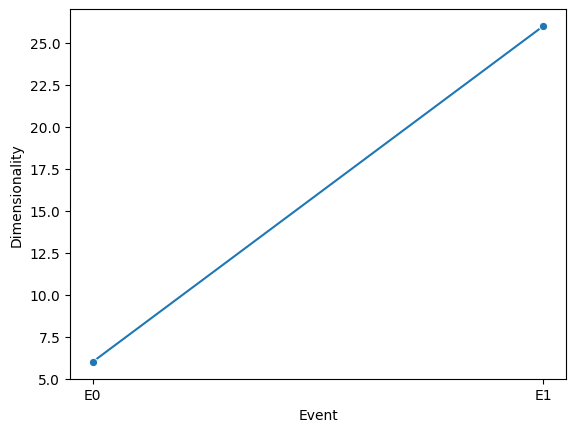

In [ ]:
sns.lineplot(data=dim_df, x='Event', y='Dimensionality', marker='o')

Now, when observing the MAPE (Mean Absolute Percentage Error) metrics, we can see that, in both models, the value of this metric is very high. However, a good value for this metric would be lower, since it indicates the variation, both upwards and downwards, between the value predicted by the model and the real value.

This behavior can be explained by two main problems. The first is related to the nature of the problem, since predicting prices assigned to products is a very complex task. Often, the price of a product is the result of a series of factors that are not represented in the dataset or may even have "come from the head" of the business owner.

The second possible problem is the relatively large dimensionality of the dataset, which can make it difficult to effectively train the model and negatively impact the accuracy of the predictions.

However, despite the high value, we can observe that Linear Regression obtained a lower value than that obtained by Random Forest.

Regarding the value of the RMSE (Root Mean Squared Error) metric, lower values ​​are also better. This metric, similar to the previous one, indicates the variation, both higher and lower, between the predicted value and the real value; however, it expresses this variation in the same unit of measurement as the predicted characteristic.

However, as we can see, both models obtained high values, possibly due to the same problems already reported.

Finally, regardless of the high values ​​for both models, it is clear that Linear Regression presents a lower value than Random Forest.